## Load Verification Dataset

In [1]:
from clustering import LabelGuidedKMeansUtils
from importlib import reload
import clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
n_outputs = 5
verification_csv = '../data/v3.2.2_train.csv'
X_orig, Y_orig = LabelGuidedKMeansUtils.load_dataset(verification_csv, n_outputs)

INFO:clustering:reading dataset from ../data/v3.2.2_train.csv...
/home/sai/Desktop/Marabou/scad_tot/venv/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df = pd.read_csv(verification_csv)
df.head(5)

,Unnamed: 0,FixationDuration,FixationSeq,FixationStart,FixationX,FixationY,GazeDirectionLeftZ,GazeDirectionRightZ,PupilLeft,PupilRight,...,RangeW,RightLaneDist,RightLaneType,LeftLaneDist,LeftLaneType,TOT_fast,TOT_med_fast,TOT_med,TOT_med_slow,TOT_slow
0,0,-0.780283,-0.320118,-0.634037,-0.644751,0.492967,0.502493,0.526916,-0.458088,-0.529135,...,-0.045997,0.542369,0.18449,-0.547283,-0.162322,1,0,0,0,0
1,1,0.239264,-0.151749,-0.127157,-0.064991,-0.044038,0.310850,0.323276,-0.130863,-0.225694,...,-0.045997,0.095554,0.18449,-0.090084,-0.162322,0,1,0,0,0
2,2,0.239264,-0.151749,-0.127157,-0.064991,-0.044038,-2.433853,-2.165789,1.959742,1.780386,...,-0.045997,-0.922012,0.18449,0.936146,-0.162322,0,0,0,0,1
3,3,0.239264,-0.151749,-0.127157,-0.064991,-0.044038,0.462147,0.502589,-2.057856,-1.911476,...,-0.045997,-0.028381,0.18449,0.031616,-0.162322,1,0,0,0,0
4,4,-1.093791,1.373701,0.891928,-2.465806,-1.648940,0.266054,0.292115,-0.821672,-0.916865,...,-0.045997,0.878297,0.18449,-0.876203,-0.162322,1,0,0,0,0


In [4]:
labels = [np.where(r==1)[0][0] for r in Y_orig]
len(labels)

291632

In [34]:
mins = np.min(X_orig,axis = 1)
(X_orig[0] - mins[0])/(np.max(X_orig,axis = 1)[0]-mins[0])

array([0.14413971, 0.07447785, 0.0670591 , 0.21506468, 0.27062082,
       0.29846477, 0.29836592, 0.24587329, 0.21398656, 0.27791757,
       0.29041741, 0.33185965, 0.25101693, 0.30518564, 0.24736641,
       0.24464786, 0.        , 1.        , 0.87932182, 0.30163263,
       0.24862334, 0.25406511, 0.2695225 , 0.25178362, 0.23807562])

In [3]:
X, Y = X_orig.copy(), Y_orig.copy()
X, Y = LabelGuidedKMeansUtils.remove_outliers(X, Y,tolerance= 10)

print(f'dropped {X_orig.shape[0] - X.shape[0]} outliers from {X_orig.shape[0]} inputs')
X.shape, Y.shape

dropped 1728 outliers from 291632 inputs


((289904, 25), (289904, 5))

In [10]:
weights = LabelGuidedKMeansUtils.generate_sample_weights(X,type='sum')
# weights = weights.reshape((len(weights),1))


In [11]:
min(weights)

2.115807068915026

## Generate Label Guided K-Means Regions

In [5]:
num_iters = 3
# x_axis = ['n==1','n>1','n>=10', 'n>=100','n>=1000']
# fig, axs = plt.subplots(2,3)

In [16]:
axs = axs.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [12]:
from clustering import LabelGuidedKMeans, LabelGuidedKMeansUtils
for i in range(num_iters):
    lgkmc = LabelGuidedKMeans().fit(X, Y, init_centroid='mean',weights = weights) # rand, first, none
    print("For iter:",i)
    labels = LabelGuidedKMeansUtils.print_summary(lgkmc)
#     plt.bar(x_axis,labels)
#     plt.show()

INFO:clustering:running label-guided k-means on 289904 inputs of 5 labels
INFO:clustering:completed in 41973 ms


For iter: 0
21104 regions from 289904 inputs
n == 1: 5893
n > 1: 15211
n >= 10: 5492
n >= 100: 539
n >= 1000: 1


INFO:clustering:running label-guided k-means on 289904 inputs of 5 labels
INFO:clustering:completed in 42405 ms


For iter: 1
21104 regions from 289904 inputs
n == 1: 5893
n > 1: 15211
n >= 10: 5492
n >= 100: 539
n >= 1000: 1


INFO:clustering:running label-guided k-means on 289904 inputs of 5 labels
INFO:clustering:completed in 42636 ms


For iter: 2
21104 regions from 289904 inputs
n == 1: 5893
n > 1: 15211
n >= 10: 5492
n >= 100: 539
n >= 1000: 1


In [11]:
fig.show()

/home/sai/Desktop/Marabou/scad_tot/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


In [12]:
labels

[9089, 18598, 6063, 446, 1]

<BarContainer object of 5 artists>

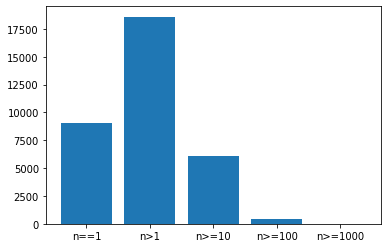

In [10]:
reload(clustering)
LabelGuidedKMeans = clustering.LabelGuidedKMeans
LabelGuidedKMeansUtils = clustering.LabelGuidedKMeansUtils

In [11]:

LabelGuidedKMeansUtils.print_summary(lgkmc)

27478 regions from 289904 inputs
n == 1: 9134
n > 1: 18344
n >= 10: 6037
n >= 100: 435
n >= 1000: 0


In [ ]:
# save regions
LabelGuidedKMeansUtils.save(lgkmc, outpath='../logs/test/test_regions/lgkm.p')

In [6]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)

In [9]:
x2 = x2.reshape((3,1))

In [11]:
x1

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [25]:
import numpy as np
from sklearn.preprocessing import normalize

#x = np.random.rand(1000)*10

norm1 = x / np.linalg.norm(x)
#norm2 = normalize(x[:,np.newaxis], axis=0).ravel()
#print np.all(norm1 == norm2)
# print("Norm 1: ", norm1)
# print("Norm 2: ", norm2)
print(norm1)

[[-0.20886423  0.02961184]
 [-0.28346482 -0.31753209]
 [ 0.37413815 -0.14648113]
 [-0.09626724  0.01095494]
 [-0.24448982 -0.1188851 ]
 [-0.06352232  0.18707545]
 [ 0.25309486 -0.35274414]
 [ 0.27615021  0.23972342]
 [ 0.3726454   0.02550999]
 [-0.1571058   0.06438898]]


## Verify Regions

In [ ]:
import os
from clustering import LabelGuidedKMeansUtils
from robustness import verify_regions, save_verified_regions

# load the regions
lgkmc = LabelGuidedKMeansUtils.load('../logs/test/test_regions/lgkm.p')
regions = lgkmc.get_regions(sort=True)
categories = lgkmc.categories
n_categories = lgkmc.n_categories

In [ ]:
nnet_path = '../network/models/latest/model.nnet'

vregions = verify_regions(nnet_path, regions, n_categories, eprec=0.0001, rpad=10, verbose=1, timeout=10)
save_verified_regions(vregions, outdir=f'../logs/region_robustness_cexs/chunk_{chunk_number}')